In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt

#Dataset
- 20 news group dataset: a collectoin of 20,000 newsgroup document
- Sentiment140 dataset:

##20 News Group 
- implementation


In [ ]:
from sklearn.datasets import fetch_20newsgroups #import 20 newgroups
twenty_train = fetch_20newsgroups(subset='train',shuffle=True, random_state=42,remove=(['headers','footers','quotes'])); #no random shuffle 
twenty_test = fetch_20newsgroups(subset='test',shuffle=True, random_state=42,remove=(['headers','footers','quotes'])); #no random shuffle

- Training x and y

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(min_df=0.001)
X_train_counts = count_vect.fit_transform(twenty_train.data)
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
tfidf_transformer = TfidfTransformer()
x_train = tfidf_transformer.fit_transform(X_train_counts)
y_train=twenty_train.target
# x_train.shape

- Testing x and y

In [ ]:
X_test_counts = count_vect.transform(twenty_test.data)
x_test = tfidf_transformer.transform(X_test_counts)
y_test=(twenty_test.target)

In [ ]:
x_train.shape

(11314, 9349)

##Sentiment 140 dataset
- Implementation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data implementation
col_name=['polarity','id','date','query','user','text']
traindata='/content/drive/MyDrive/comp551-A2/trainingandtestdata/training.1600000.processed.noemoticon.csv'
testdata='/content/drive/MyDrive/comp551-A2/trainingandtestdata/new_testdata.manual.2009.06.14.csv'

raw_train = pd.read_csv(traindata, sep=',',header=None, names= col_name, encoding='latin-1')
raw_train = raw_train.sample(frac=1).reset_index(drop=True)
raw_train = raw_train[:int(len(raw_train)*0.5)] #just use half of it since it's too large
raw_train['polarity'] = raw_train['polarity'].replace(4,1) #3 classes: 0,4 convert into 0,1

raw_test = pd.read_csv(testdata, sep=',',header=None, names= col_name,encoding='latin-1')
raw_test = raw_test.sample(frac=1).reset_index(drop=True)
raw_test['polarity']= raw_test['polarity'].replace(4,1) #3 classes: 0,4 convert into 0,1

train_fin=raw_train[['text']]
test_fin=raw_test[['text']]
y2_train=raw_train['polarity'].values ##y_train for sentiment 140
y2_test=raw_test['polarity'].values ##y_test for sentiment 140

- Cleaning data

In [ ]:
import re
from bs4 import BeautifulSoup
def clean(x_text):
  clean1 = BeautifulSoup(x_text, 'lxml') #decode HTML language
  clean2 = re.sub(r'@[A-Za-z0-9]+',' ', clean1.get_text()) #clean @
  clean2 = re.sub(r'www.[^ ]+', ' ', clean2) #clean url
  clean3 = re.sub('https?://[A-Za-z0-9./]+',' ', clean2) #clean url
  try: 
    clean3.decode("utf-8-sig")
    clean4 = clean3.decode("utf-8-sig") #decode utf-8-sig if the string contains one
    clean4 = clean4.replace(u"\ufffd", "?") #replace the utf-8-sig text with ? 
  except:
    clean4=clean3
  clean5 = re.sub("[^a-zA-Z]",' ', clean4) #keep only letter
  clean6 = clean5.lower()
  return clean6
def clean_out(text):
  text_list=[]
  for i in text:
    text_list.append(clean(i))
  return text_list

In [ ]:
x1_clean=clean_out(train_fin.text) #x_train after cleaning
x2_clean=clean_out(test_fin.text) #x_test after cleaning

- Convert into vector

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=0.001)
X_train_counts = count_vect.fit_transform(x1_clean)
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
tfidf_transformer = TfidfTransformer()
x2_train = tfidf_transformer.fit_transform(X_train_counts) ##x_train for setiment 140
X_test_counts = count_vect.transform(x2_clean)
x2_test = tfidf_transformer.transform(X_test_counts) ##x_test for setiment 140

## Get Data 
- x_train, y_train, x_test, y_test
- with precentage of training data

In [ ]:
def getnewsdata(percentage=1):
  len1=x_train.shape[0]
  x_tr=x_train
  x_1=x_tr[:int(len1*percentage)]
  len2=y_train.shape[0]
  y_tr=y_train
  y_1=y_tr[:int(len2*percentage)]
  x_2=x_test
  y_2=y_test
  return x_1, y_1, x_2, y_2;

def getsentdata(percentage=1):
  len1=x2_train.shape[0]
  x2_tr=x2_train
  x_1=x2_tr[:int(len1*percentage)]
  len2=y2_train.shape[0]
  y2_tr=y2_train
  y_1=y2_tr[:int(len2*percentage)]
  x_2=x2_test
  y_2=y2_test
  return x_1, y_1, x_2, y_2;

def getnewsdata_np(percentage=1):
  x_train_array=x_train.toarray()
  len1=len( x_train_array)
  x_tr_ar=x_train_array
  x_train_array=x_tr_ar[:int(len1*percentage)]
  len2=len(y_train)
  y_tr=y_train
  y_train_array=y_tr[:int(len2*percentage)]
  x_test_array=x_test.toarray()
  y_test_array=y_test
  return x_train_array, y_train_array, x_test_array, y_test_array;

def getsentdata_np(percentage=1):
  x2_train_array=x2_train.toarray()
  len1=len( x2_train_array)
  x2_tr_ar=x2_train_array
  x2_train_array=x2_tr_ar[:int(len1*percentage)]
  len2=len(y2_train)
  y2_tr=y2_train
  y2_train_array=y2_tr[:int(len2*percentage)]
  x2_test_array=x2_test.toarray()
  y2_test_array=y2_test
  return x2_train_array, y2_train_array, x2_test_array, y2_test_array;

In [ ]:
# x_1, y_1, x_2, y_2=getsentdata_np()
# x_1.shape

(800000, 1113)

# Models 


## Logistic Regression 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
np.random.seed(1024)

Parameters To Consider:

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [ ]:
# Multi Class Model
model_multi = LogisticRegression(multi_class='multinomial', solver='sag')

# Binary Class Model
model_binary = LogisticRegression(multi_class='ovr',solver='sag',penalty='l2')

## Naive Bayes

### GNB

In [2]:
class GaussianNaiveBayes:
    
    def __init__(self):
        return
    
    def fit(self, x, y):
        N, D = x.shape
        C = np.max(y) + 1
        mu, sigma = np.zeros((C,D)), np.zeros((C,D))
        Nc = np.zeros(C) 
        for c in range(C):
            x_c = x[y == c]                           
            Nc[c] = x_c.shape[0]                      
            mu[c,:] = np.mean(x_c,0)                 
            sigma[c,:] = np.std(x_c, 0)              
            
        self.mu = mu                                  
        self.sigma = sigma                            
        self.pi = (Nc+1)/(N+C)                        
        return self

In [3]:
def logsumexp(Z):                                                
    Zmax = np.max(Z,axis=0)[None,:]                             
    log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
    return log_sum_exp

def predict(self, xt):
    Nt, D = xt.shape
    log_prior = np.log(self.pi)[:, None]
    
    log_likelihood = -.5 * np.log(2*np.pi) - np.log(self.sigma[:,None,:]) -.5 * (((xt[None,:,:] - self.mu[:,None,:])/self.sigma[:,None,:])**2)
    log_likelihood = np.sum(log_likelihood, axis=2)
    log_posterior = log_prior + log_likelihood
    posterior = np.exp(log_posterior - logsumexp(log_posterior))
    return posterior.T                                                  

GaussianNaiveBayes.predict = predict

### MNB

In [43]:

class MultinomialNaiveB:
    
    def __init__(self):
        return
    
    def fit(self, x, y):
        N, D = x.shape 
        #in this case I get number of documents (or sentences), number of distinct words (after removing non useful words)
        C = np.max(y) + 1
        Nc = np.zeros(C) # number of instances in class c
        # one parameter for each feature conditioned on each class
        theta = np.zeros((C,D))
         
        # for each class get the MLE for the mean and std
        for c in range(C):
            x_c = x[y == c]         #slice all the documents in class c
            Nc[c] = x_c.shape[0]    #get number of documents in class c
            for d in range(D):
              theta[c,:] = np.sum(x_c[:,d])/np.sum(x_c)  # count of word d in all documents labelled c/ number of words in all documments in class c
            
            
        self.theta = theta                                  # C x D   
        self.pi = (Nc+1)/(N+C)                      # C x 1 #Laplace smoothing (using alpha_c=1 for all c) you can derive using Dirichlet's distribution
        return self

    def predict(self, xt):
      Nt, D = xt.shape
      # for numerical stability we work in the log domain
      # we add a dimension because this is added to the log-likelihood matrix 
      # that assigns a likelihood for each class (C) to each test point, and so it is C x N
      log_prior = np.log(self.pi)[:, None]
      # sum(log(combinatorics) + sum(x_d* log(theta_(d,y)))

      log_likelihood = np.sum(xt[None,:,:] * self.theta[:,None,:])  # sum( x_d* log(theta_(d,y) ) <<----------------------------
      # but xt is N x D and theta is C x D
      # now we sum over the feature dimension to get a C x N matrix (this has the log-likelihood for each class-test point combination)
      log_likelihood = np.sum(log_likelihood, axis=2) # log_likelihood, axis=2
      # posterior calculation
      log_posterior = log_prior + log_likelihood # C x N + C X D
      posterior = np.exp(log_posterior - logsumexp(log_posterior))
      return posterior.T  

### Eval function for NB

In [ ]:
#evaluate accuracy NB
def eva_acc_naive( model_type, x_train, y_train, x_test, y_test):
  y_pred =np.zeros(y_test.shape)
  if model_type == 'GNB':
    model = GaussianNaiveB()
    model.fit(x_train, y_train)
    y_prob = model.predict(x_test)
    y_pred = np.argmax(y_prob,1)
  elif model_type == 'MNB':
    model = MultinomialNaiveB()
    model.fit(x_train, y_train)
    y_prob = model.predict(x_test)
    y_pred = np.argmax(y_prob,1)
 ## NEED TO ADD OTHER TYPES HERE

  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  print(f'test accuracy for GNB: {accuracy}')
  return accuracy, y_pred

#Testing Models

In [ ]:
def evaluate_acc(true_label, target_label):
  return np.mean(true_label == target_label)*100


## Logistic Regression

### NewsData (multiclassification)

55.6558682952735
61.25862984599044
63.024429102496015
64.84333510355815
65.61338289962825


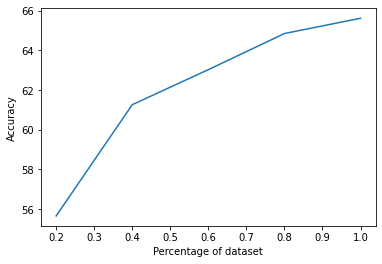

In [ ]:
x_axis=[]
acc=[]
for i in [0.2,0.4,0.6,0.8,1]:
  # Get the data 
  x_axis.append(i)
  x_tr,y_tr,x_te,y_te = getnewsdata(i)
  
  # Fit the model 
  model_multi.fit(x_tr, y_tr)

  # Predict Results 
  y_pred = model_multi.predict(x_te)

  # Results 
  accuracy = evaluate_acc(y_pred, y_te)
  acc.append(accuracy)
  print(accuracy)

plt.plot(x_axis,acc)
plt.ylabel("Accuracy")
plt.xlabel("Percentage of dataset")
plt.show() 

### SentimentData (binary classification) 

74.93036211699165
76.32311977715878
75.76601671309191
75.4874651810585
75.4874651810585


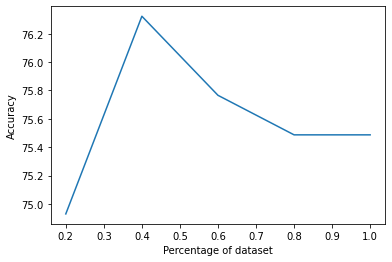

In [ ]:
x2_axis=[]
acc2=[]
for j in [0.2,0.4,0.6,0.8,1]:
  # Get the data 
  x2_axis.append(j)
  x2_tr,y2_tr,x2_te,y2_te = getsentdata(j)
  
  # Fit the model 
  model_binary.fit(x2_tr, y2_tr)

  # Predict Results 
  y2_pred = model_binary.predict(x2_te)

  # Results 
  accuracy2 = evaluate_acc(y2_pred, y2_te)
  acc2.append(accuracy2)
  print(accuracy2)

plt.plot(x2_axis,acc2)
plt.ylabel("Accuracy")
plt.xlabel("Percentage of dataset")
plt.show() 

##Naive Bayes

###NewsData (multiclassification)

In [ ]:
# Fit the model 
# Predict Results 
accn=[]
for i in [0.2,0.4,0.6,0.8]:
  x_train_array, y_train_array, x_test_array, y_test_array = getnewsdata_np(i)
  accuracy=eva_acc_naive('MNB',x_train_array, y_train_array,x_test_array, y_test_array) #x_train, y_train, x_test, y_test
  accn.append(accuracy*100)

###SentimentData (binary classification)

In [ ]:
accn2=[]
for i in [0.2,0.4,0.6,0.8,1]:
  x_train, y_train, x_test, y_test = getsentdata_np(i)
  model = GaussianNaiveBayes()
  model.fit(x_train, y_train)
  y_prob = model.predict(x_test)
  y_pred = np.argmax(y_prob, 1)
  accuracy = np.sum(y_pred == y_test)/y_pred.shape[0]
  print(f'test accuracy: {accuracy}')
  accn2.append(accuracy*100)

In [ ]:
#Plot of news data
plt.plot(x_axis,acc)
plt.plot(x_axis,accn)
plt.legend(['regression', 'naive bayes'], loc='upper left')
plt.ylabel("Accuracy")
plt.xlabel("Percentage of dataset")
plt.show() 

In [ ]:
#plot of sentiment datas
plt.plot(x_axis,acc2)
plt.plot(x_axis,accn2)
plt.legend(['regression', 'naive bayes'], loc='upper left')
plt.ylabel("Accuracy")
plt.xlabel("Percentage of dataset")
plt.show() 

# K Fold Cross Validation

In [ ]:
def concat(datasets, y=False):
  
  if y:
    colCount = 1
  else:
    colCount = datasets[0].shape[1]

  rowCount = 0
  for data in datasets:
    rowCount += len(data)
  
  arr = np.zeros((rowCount, colCount)) 
  
  i = 0
  for data in datasets:
    for row in data:
      arr[i] = row
      i+=1
  
  return arr

# Returns the indices of the k sets of validation + training data
def cross_validation_split(x, y, k_folds):

  # split the data into k folds
  x_folds = np.array_split(x, k_folds)
  y_folds = np.array_split(y, k_folds)

  # get the train + validation set: [ fold1[train,val], fold2[train,val], ....] 
  x_train_val_sets = [] 
  y_train_val_sets = [] 

  # for every fold separate train and validation 
  for k in range(k_folds):
  
    # Get validation data 
    x_val = x_folds[k]
    y_val = y_folds[k]

    # Get the rest (K-1) as train data
    # Removes the val data from folds, and concatenate the rest
    x_train = concat(np.delete(x_folds,k,0)) 
    y_train = concat(np.delete(y_folds,k,0),y=True)

    # Add to masterset 
    x_train_val_sets.append([x_train, x_val])
    y_train_val_sets.append([y_train, y_val])

    print(str(k)+" fold done")

  return x_train_val_sets, y_train_val_sets

def kfoldCV(x_folds, y_folds, model):

  all_results = []

  # For every fold run the model on the data 
  for i, fold in enumerate(x_folds):
    
    # Get the train data and validation data 
    x_train, x_val = fold[0], fold[1]
    y_train, y_val = y_folds[i][0], y_folds[i][1]

    #convert back to sparse matrix
    x_trainf = sparse.csr_matrix(x_train)
    x_valf = sparse.csr_matrix(x_val)
    # fit the model 
    model.fit(x_trainf, y_train)

    # predict the model 
    y_val_pred = model.predict(x_valf)

    # calculate the result of this fold (Accuracy or validation error?)
    result = evaluate_acc(y_val, y_val_pred)

    # append accuracy of this fold to all_results
    all_results.append(result)

  # Return the avg accuracy 
  avg = sum(all_results)/len(all_results)

  print(all_results)
  return avg

# Finding Best Parameters using K Fold on Logistic Regression

### Parameters of interest:

*   Verbosity:  verboseint, default=0
*   Penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’



In [ ]:
# Run K Fold given the data
def runKFold(x_folds, y_folds, multi=True):

  all_acc = [] 
  penalties = ["none","l2"]
  solvers = ["newton-cg","sag"]

  for s in solvers:
    for p in penalties:
      param = s+" and "+p
      print(param)
      
      if multi:
        model = LogisticRegression(multi_class='multinomial', solver=s, penalty=p)
      else:
        model = LogisticRegression( multi_class='ovr', solver=s, penalty=p)

      avg = kfoldCV(x_folds, y_folds, model)
      all_acc.append((param,avg))
  
  print(all_acc)
  

#### News Data

In [ ]:
x_train, y_train, x_test, y_test = getnewsdata_np()
x_train_val_sets, y_train_val_sets = cross_validation_split(x2_train, y2_train, 5)

In [ ]:
runKFold(x_train_val_sets, y_train_val_sets,False)

#### SentimentData (Binary)

In [ ]:
x2_train, y2_train, x2_test, y2_test = getsentdata_np(0.2)
x2_train_val_sets, y2_train_val_sets = cross_validation_split(x2_train, y2_train, 5)

0 fold done
1 fold done
2 fold done
3 fold done
4 fold done


In [ ]:
runKFold(x2_train_val_sets, y2_train_val_sets, False)